In [4]:
from scipy.stats import chisquare, chi2_contingency
import scipy.stats as stats

## Machine Learning Model Building Pipeline: Data Analysis

Following are the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Data Analysis**

We will use the dataset "data.csv"

===================================================================================================

## Predicting lead scoring

The aim of the project is to build a machine learning model in which a score is given to each of the leads such that prospects with a higher score have a bigger chance of conversion and vice versa.


### Why is this important? 

Predicting scores of conversion is useful to identify fruitful investments (in terms of time spent and effort) for the sales force.


### What is the objective of the machine learning model?

We aim to minimise the difference between the real conversion status and the conversion estimated by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

====================================================================================================

## Prospect dataset: Data Analysis

In the following cells, we will analyse the variables of the prospect Dataset from data.csv. 

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_theme()

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('../data/data.csv', sep=';')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(9193, 35)


,ID_CLIENT,ORIGINE_LEAD,SOURCE_LEAD,NIVEAU_LEAD,QUALITE_LEAD,CONTACT_PAR_MAIL,CONTACT_PAR_TELEPHONE,STATUT_ACTUEL,CONVERTI,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,DERNIERE_ACTIVITE,DERNIERE_ACTIVITE_NOTABLE,PAYS,VILLE,SPECIALISATION,TAGS,INDEX_ACTIVITE,INDEX_PROFIL,SCORE_ACTIVITE,SCORE_PROFIL,ANNONCE_VUE,MAGAZINE,ARTICLE_JOURNAL,FORUM,JOURNAUX,PUB_DIGITALE,RECOMMANDATION,Comment avez-vous entendu parler de nous ?,Souhaites-tu recevoir plus d'infos sur notre cours ?,Souhaites-tu recevoir des mises à jour sur nos programmes ?,Souhaites-tu recevoir des mises à jour par message privé ?,Souhaites-tu payer par chèque ?,Souhaites-tu recevoir une copie de notre livre blanc ?
0,628707,Formulaire Lead Add,Olark Chat,Select,NaN,Non,Non,Sans emploi,0,0.0,0,0.0,Email ouvert,Email ouvert,NaN,Select,Marketing Management,NaN,NaN,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
1,650444,Soumission landing page,Organic Search,Autre leads,Pas du tout pertinent,Non,Non,Sans emploi,0,3.0,519,3.0,Page visitée sur le site,Modifié,India,Autres villes de Maharashtra,"Banking, Investment And Insurance",Ne pas suivre de formation continue,Moyen,Elevé,15.0,17.0,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Oui
2,631159,Soumission landing page,Google,NaN,NaN,Non,Non,NaN,0,3.0,323,3.0,Email ouvert,Email ouvert,India,Mumbai,Hospitality Management,NaN,NaN,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,NaN,Non,Non,Non,Non,Non
3,637163,Formulaire Lead Add,Reference,Lead potentiel,Pourrait être pertinent,Non,Non,Sans emploi,1,0.0,0,0.0,Email ouvert,Email ouvert,NaN,Select,"Banking, Investment And Insurance",Reviendra après avoir lu le courriel,Moyen,Elevé,15.0,19.0,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
4,644599,Soumission landing page,Direct Traffic,NaN,NaN,Non,Non,NaN,0,3.0,258,3.0,Email ouvert,Email ouvert,India,Autres villes,Finance Management,NaN,Moyen,Moyen,14.0,16.0,Non,Non,Non,Non,Non,Non,Non,Etudiant d'une certaine école,Non,Non,Non,Non,Non


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 35 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID_CLIENT                                                    9193 non-null   int64  
 1   ORIGINE_LEAD                                                 9193 non-null   object 
 2   SOURCE_LEAD                                                  9157 non-null   object 
 3   NIVEAU_LEAD                                                  6496 non-null   object 
 4   QUALITE_LEAD                                                 4445 non-null   object 
 5   CONTACT_PAR_MAIL                                             9193 non-null   object 
 6   CONTACT_PAR_TELEPHONE                                        9193 non-null   object 
 7   STATUT_ACTUEL                                                6515 non-null   o

In [7]:
data.describe()

,ID_CLIENT,CONVERTI,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,SCORE_ACTIVITE,SCORE_PROFIL
count,9193.000000,9193.000000,9056.000000,9193.000000,9056.000000,4988.000000,4988.000000
mean,617182.181660,0.385402,3.446555,487.978462,2.362872,14.306937,16.344226
std,23396.400057,0.486717,4.861053,548.226149,2.161216,1.383616,1.809338
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596493.000000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615488.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637361.000000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


The prospect dataset contains 9193 rows, i.e., prospects, and 35 columns, i.e., variables. 

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: Lead scoring

### Missing values

which variables of the dataset contain missing values.

In [8]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values
round((data[vars_with_na].isnull().mean()*100).sort_values(ascending=False), 2).astype(str) + '%'

QUALITE_LEAD                                  51.65%
SCORE_PROFIL                                  45.74%
SCORE_ACTIVITE                                45.74%
INDEX_PROFIL                                  45.74%
INDEX_ACTIVITE                                45.74%
TAGS                                          36.32%
NIVEAU_LEAD                                   29.34%
STATUT_ACTUEL                                 29.13%
PAYS                                          26.61%
Comment avez-vous entendu parler de nous ?     23.9%
SPECIALISATION                                 15.6%
VILLE                                         15.39%
NB_PAGES_VUES_PAR_VISITE                       1.49%
NB_VISITES                                     1.49%
DERNIERE_ACTIVITE                              1.12%
SOURCE_LEAD                                    0.39%
dtype: object

remove variables with more than 60 % missing values.

In [9]:
na_thresh = .6
thresh = (1 - na_thresh) * data.shape[0]
data.dropna(axis='columns', thresh=thresh, inplace=True)

Our dataset contains a few variables with missing values. We need to account for this in our following data processing, where we will engineer the variables for use in Machine Learning Models.

### Numerical variables

Numerical variables we have in the dataset

Now, CONVERTI is our target variable, let's remove it from our numerical variables :

Furthermore, we notice the variable ID_CLIENT, which is an indicator of the prospect. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each prospect in the dataset. See below:

In [10]:
# make list of numerical variables
num_vars = [var for var in data.columns if (data[var].dtypes != 'O') & (var != 'ID_CLIENT')  & (var != 'CONVERTI')]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  5


,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,SCORE_ACTIVITE,SCORE_PROFIL
0,0.0,0,0.0,NaN,NaN
1,3.0,519,3.0,15.0,17.0
2,3.0,323,3.0,NaN,NaN
3,0.0,0,0.0,15.0,19.0
4,3.0,258,3.0,14.0,16.0


In [24]:
print('Number of prospect Id labels: ', len(data['ID_CLIENT'].unique()))
print('Number of prospect in the Dataset: ', len(data))

Number of prospect Id labels:  9193
Number of prospect in the Dataset:  9193


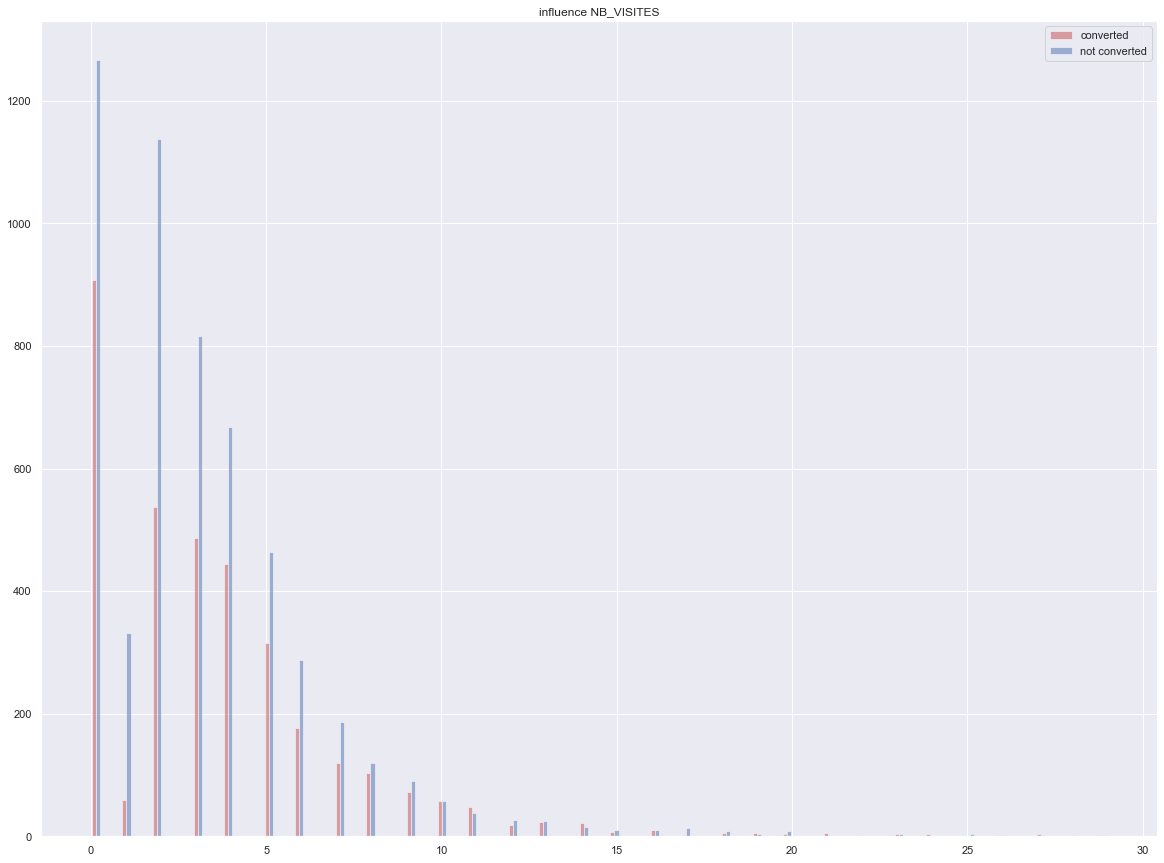

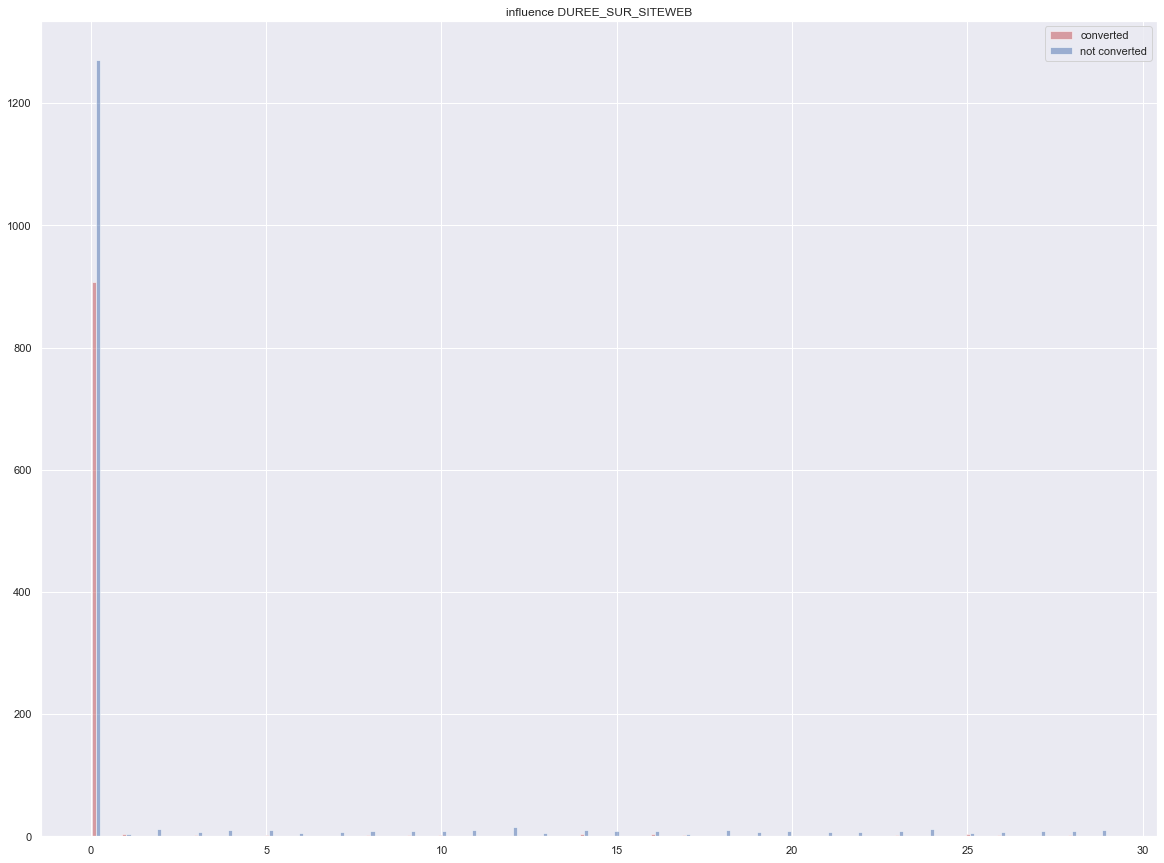

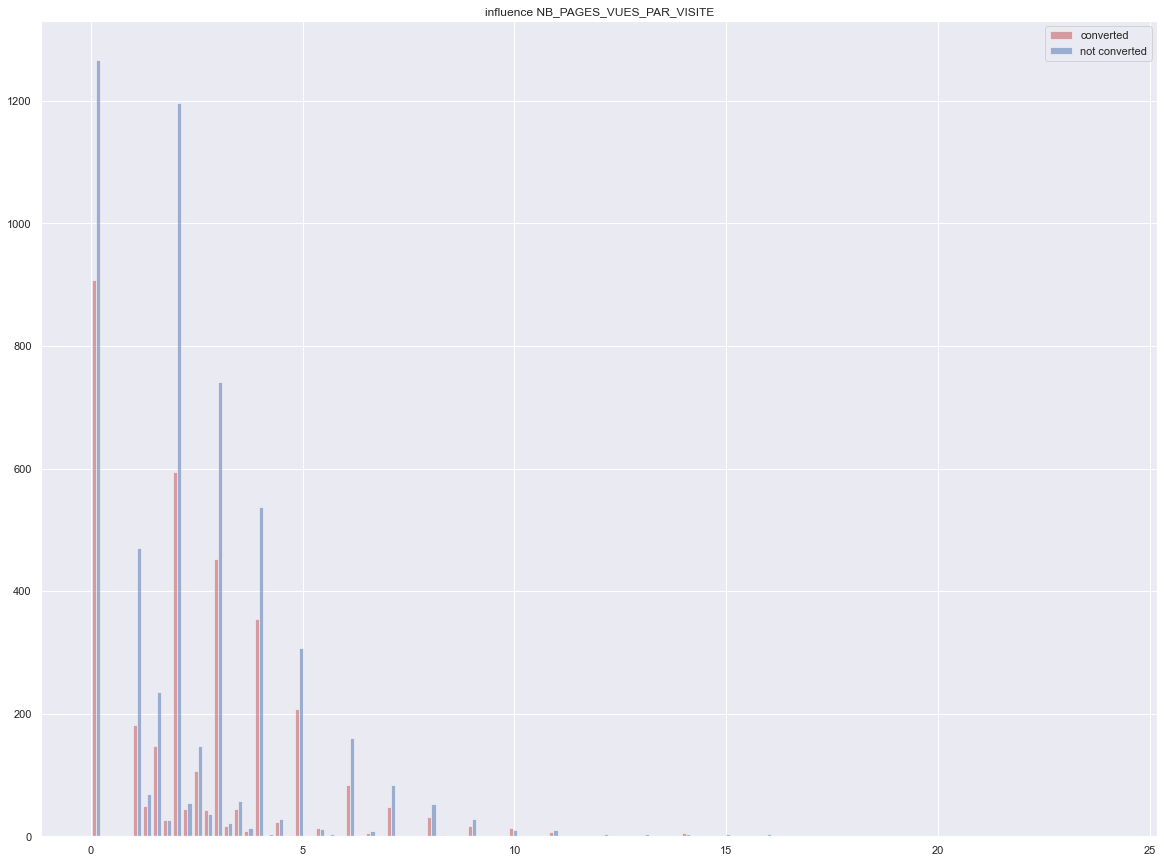

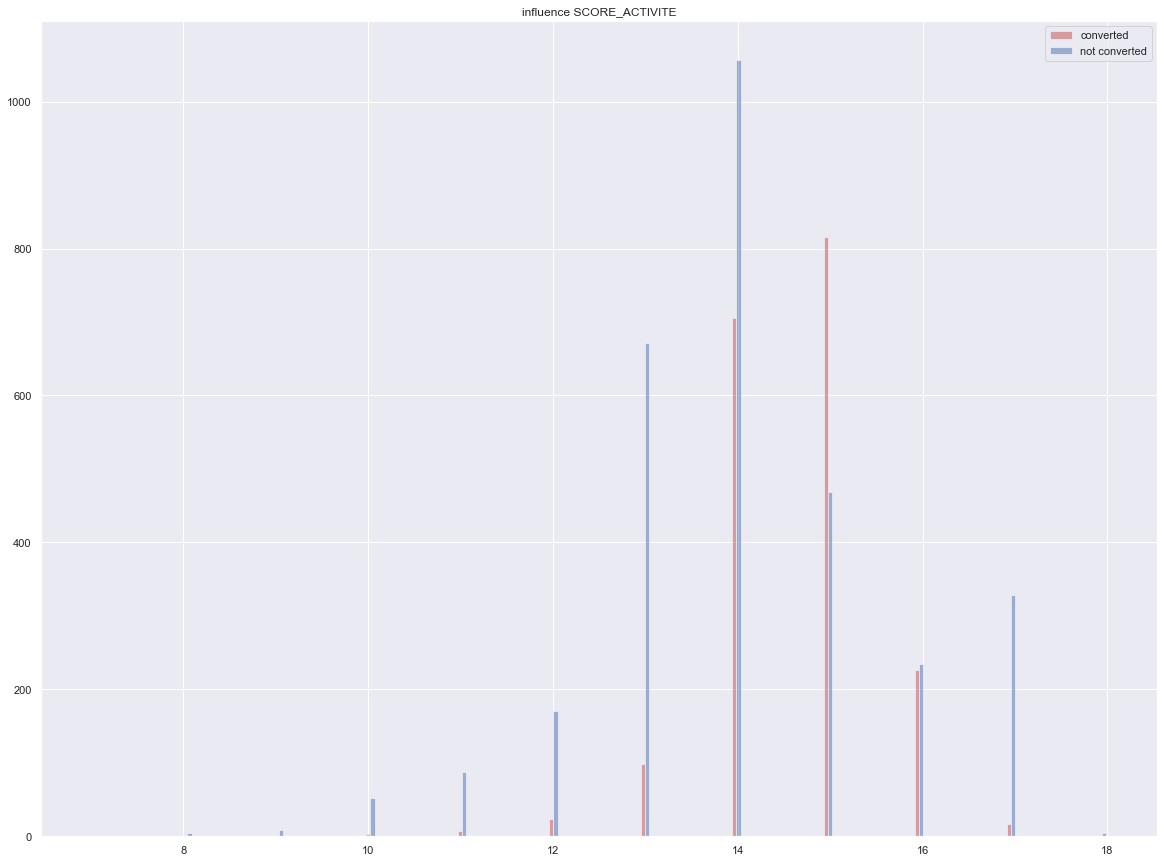

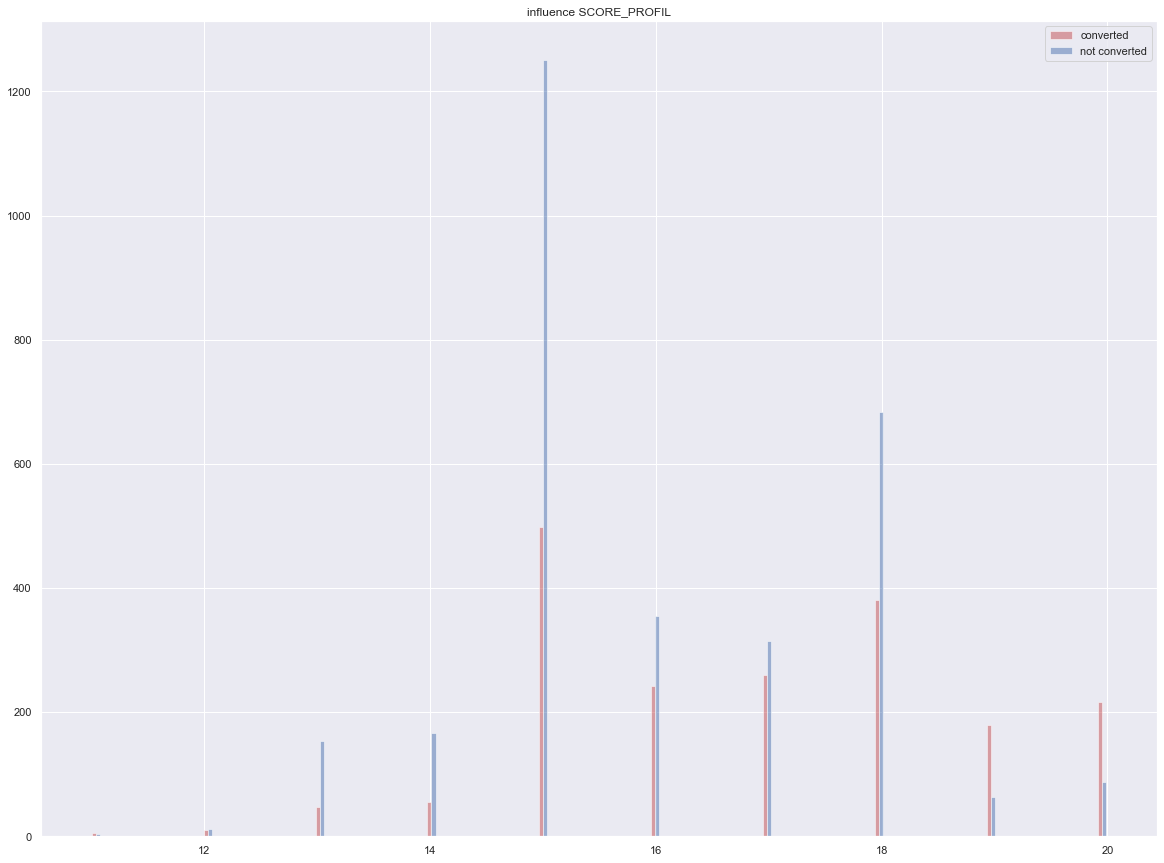

In [26]:
def _plot(col, title=''):
    is_converted = data['CONVERTI'] == 1
    is_not_converted = data['CONVERTI'] == 0
    not_outliers = data[col] < 30

    converted = data[ not_outliers & is_converted ][col]
    not_converted = data[is_not_converted & not_outliers ][col]

    plt.figure(figsize=(20,15))
    plt.hist((converted, not_converted), bins=100, alpha=0.5, label=['converted', 'not converted'], color=['r', 'b'])
    plt.legend(loc='upper right')
    plt.title(title)

for col in num_vars :
    _plot(col, title="influence "+col)

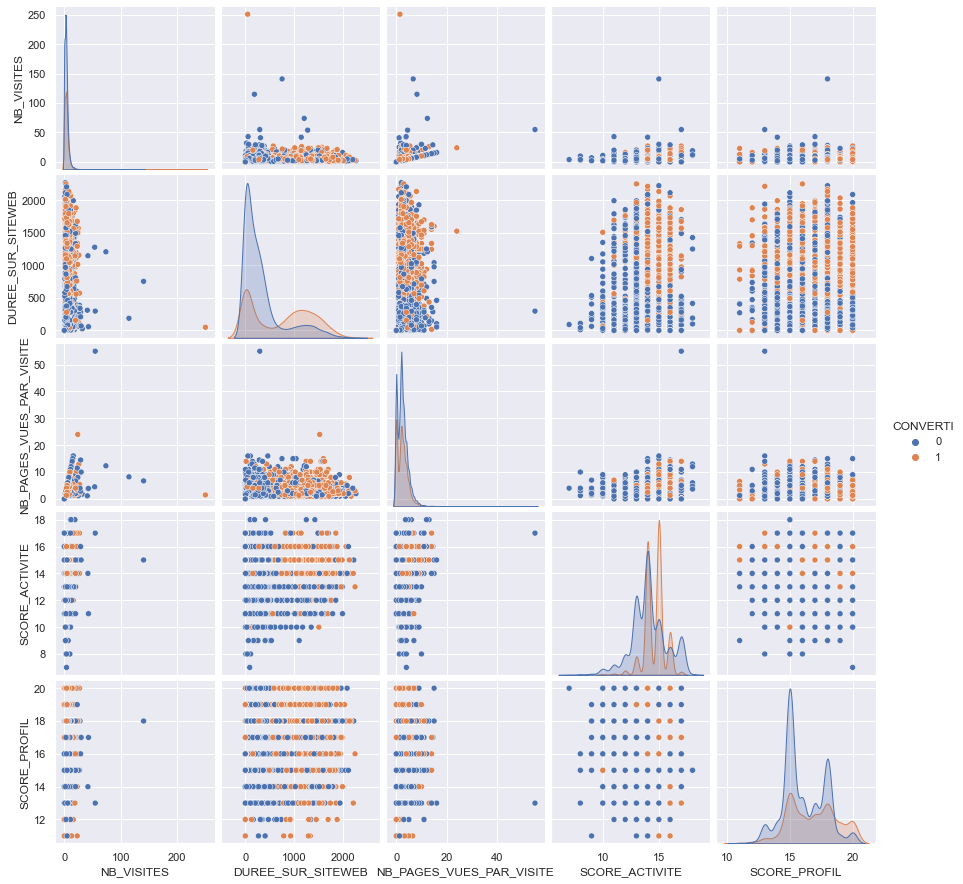

In [27]:
sns.pairplot(data=data[num_vars + ['CONVERTI']], hue="CONVERTI")

#### Temporal variables

We have no temporal variables in this dataset.

#### Discrete variables

Analysis of discrete variables, i.e., show a finite number of values

In [11]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in ['CONVERTI']]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [37]:
# let's visualise the discrete variables

data[discrete_vars].head()

,SCORE_ACTIVITE,SCORE_PROFIL
0,NaN,NaN
1,15.0,17.0
2,NaN,NaN
3,15.0,19.0
4,14.0,16.0


These discrete variables tend to be qualifications or grading scales, they refer to the score given to the prospect by the sales people.

Let's go ahead and analyse their contribution to the conversion.

SCORE_ACTIVITE  7.0  8.0  9.0  10.0  11.0   12.0   13.0    14.0    15.0  \
CONVERTI                                                                  
0               1.0  4.0  9.0  52.0  87.0  171.0  672.0  1057.0   469.0   
1               NaN  NaN  NaN   3.0   7.0   23.0   98.0   706.0   816.0   
Total           1.0  4.0  9.0  55.0  94.0  194.0  770.0  1763.0  1285.0   

SCORE_ACTIVITE   16.0   17.0  18.0  Total  
CONVERTI                                   
0               235.0  329.0   5.0   3091  
1               227.0   17.0   NaN   1897  
Total           462.0  346.0   5.0   4988  
SCORE_PROFIL  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  19.0  20.0  \
CONVERTI                                                                   
0                4    12   153   167  1251   355   315   683    63    88   
1                5    10    48    56   499   242   260   381   179   217   
Total            9    22   201   223  1750   597   575  1064   242   305   

SCORE_PROFIL  Total  
C

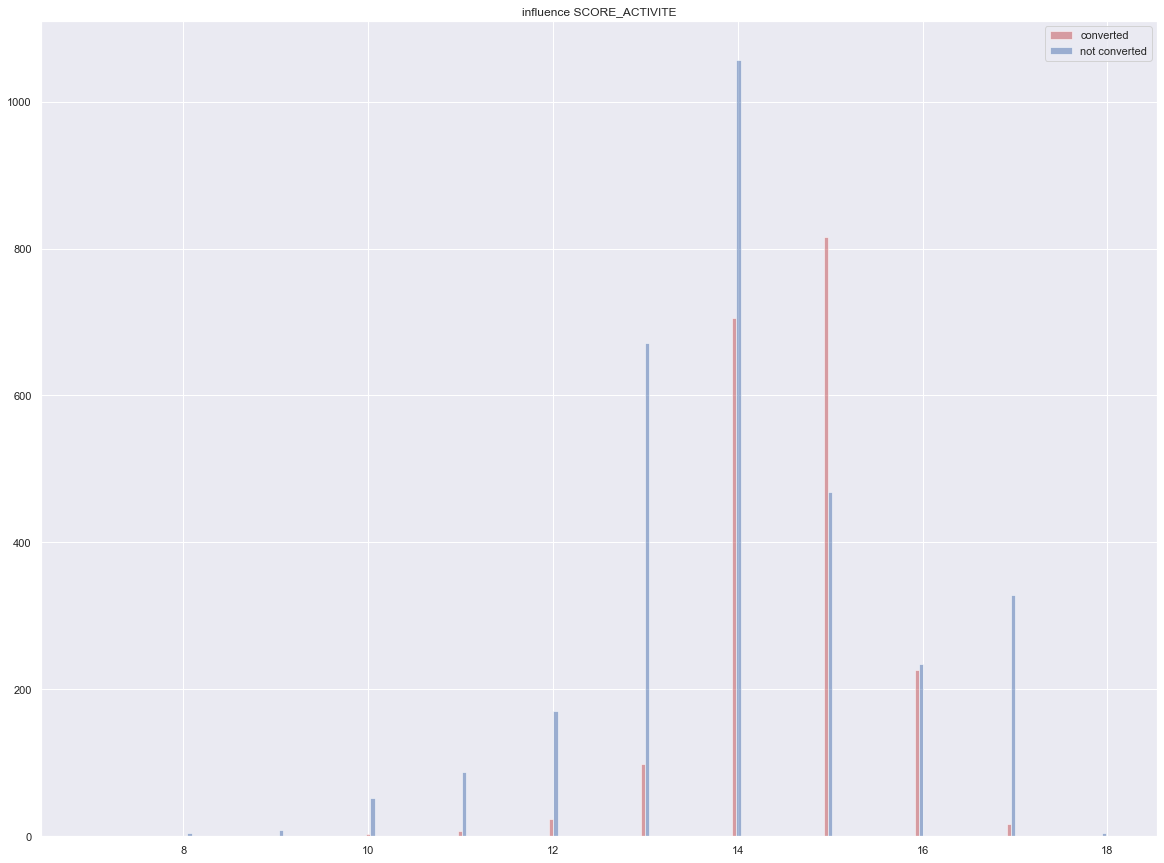

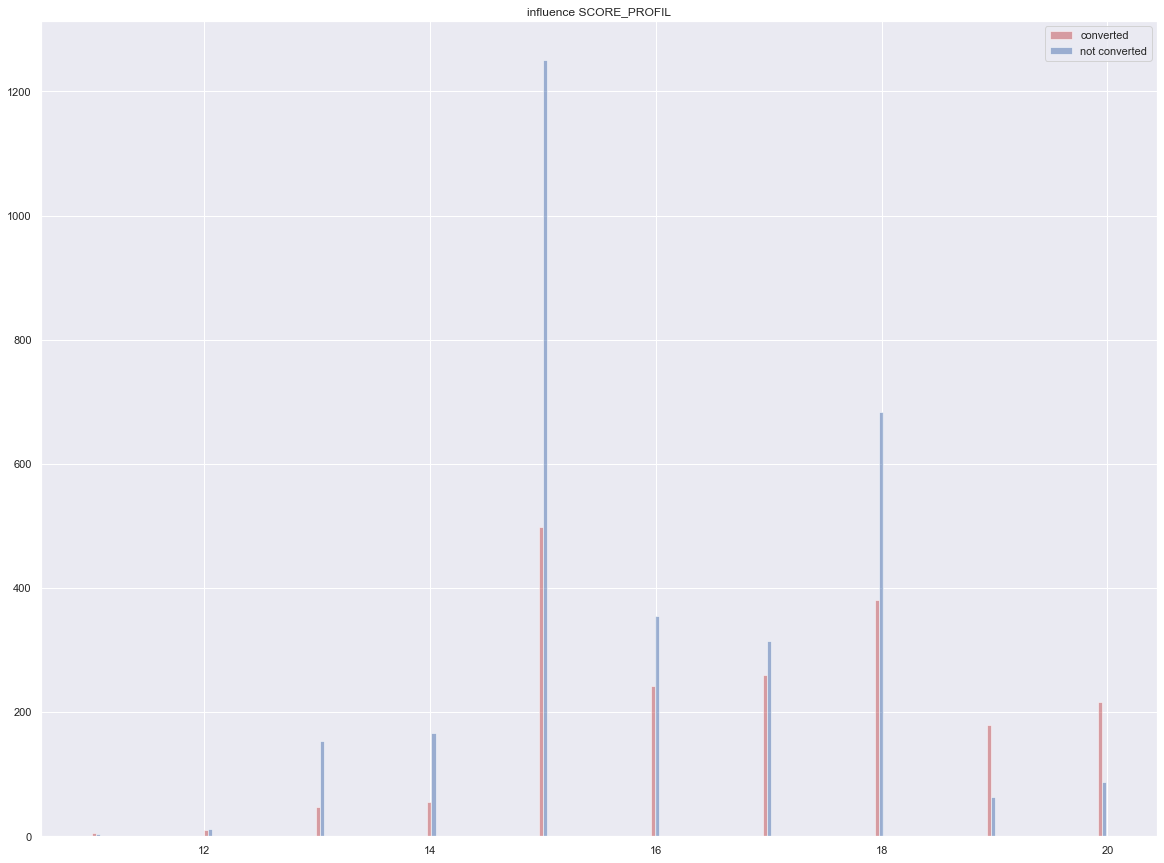

In [13]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['CONVERTI'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Conversion')
    plt.show()
    
    
    
for var in discrete_vars:
    #analyse_discrete(data, var)
    _plot(var, title="influence "+var)
    
    X = 'CONVERTI'
    Y = var
    cont = data[[X,var]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
    print(cont)

In [16]:
X = 'CONVERTI'
Y = 'SCORE_PROFIL'

cont1 = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont1

SCORE_PROFIL,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,Total
CONVERTI,,,,,,,,,,,
0,4,12,153,167,1251,355,315,683,63,88,3091
1,5,10,48,56,499,242,260,381,179,217,1897
Total,9,22,201,223,1750,597,575,1064,242,305,4988


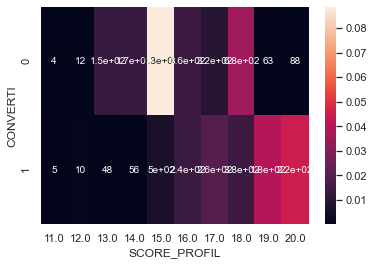

In [17]:
import seaborn as sns

tx = cont1.loc[:,["Total"]]
ty = cont1.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [18]:
X = 'CONVERTI'
Y = 'SCORE_ACTIVITE'

cont2 = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont2

SCORE_ACTIVITE,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Total
CONVERTI,,,,,,,,,,,,,
0,1.0,4.0,9.0,52.0,87.0,171.0,672.0,1057.0,469.0,235.0,329.0,5.0,3091
1,NaN,NaN,NaN,3.0,7.0,23.0,98.0,706.0,816.0,227.0,17.0,NaN,1897
Total,1.0,4.0,9.0,55.0,94.0,194.0,770.0,1763.0,1285.0,462.0,346.0,5.0,4988


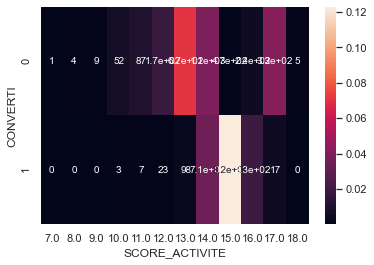

In [19]:
import seaborn as sns

tx = cont2.loc[:,["Total"]]
ty = cont2.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete variables in our dataset.

In [12]:
# make list of continuous variables
cont_vars = [ var for var in num_vars if var not in discrete_vars+['CONVERTI', 'ID_CLIENT']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  3


In [39]:
# let's visualise the continuous variables

data[cont_vars].head()

,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE
0,0.0,0,0.0
1,3.0,519,3.0
2,3.0,323,3.0
3,0.0,0,0.0
4,3.0,258,3.0


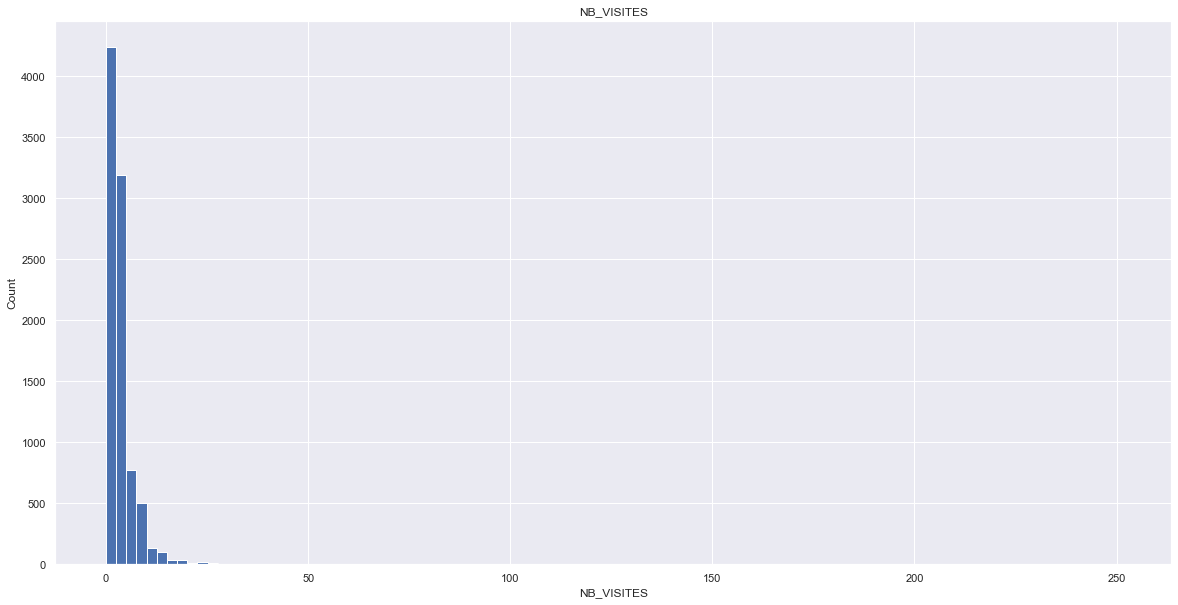

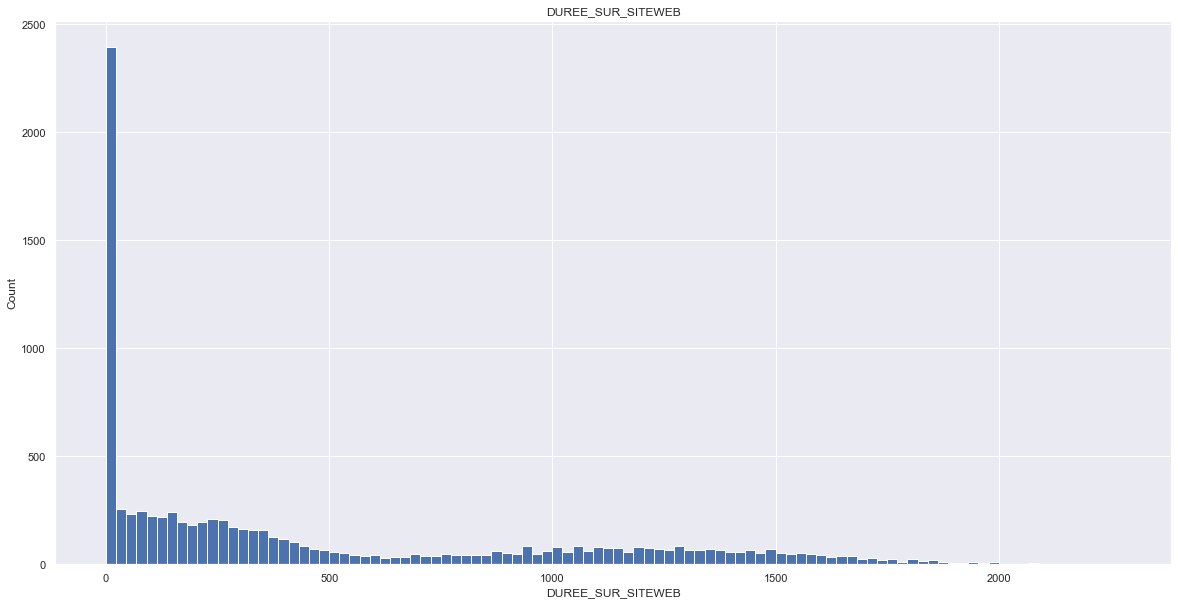

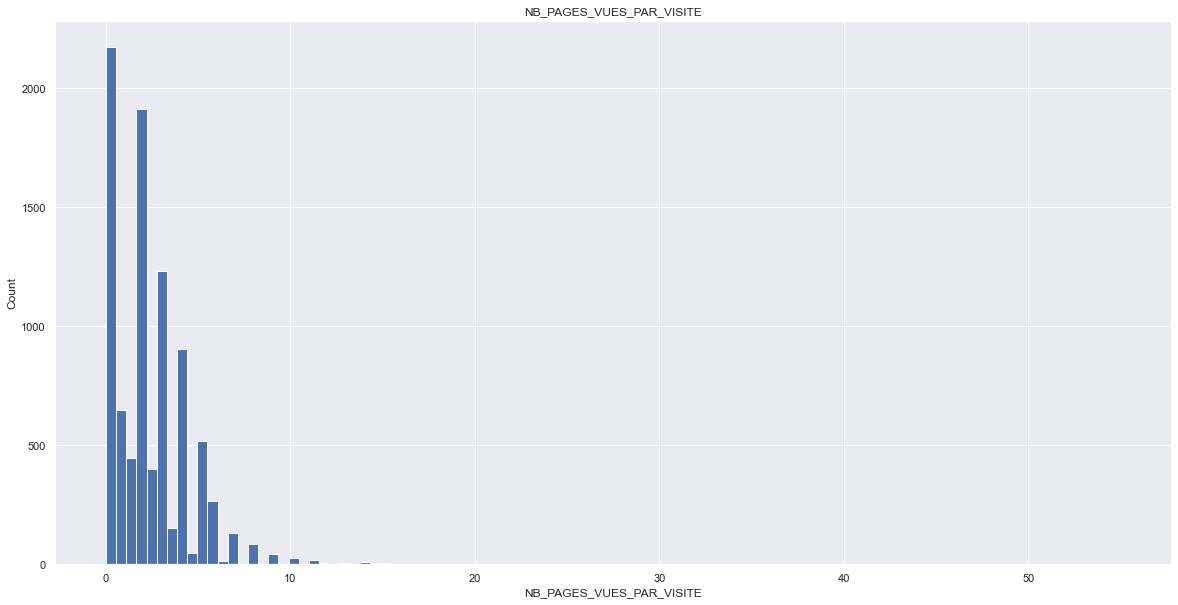

In [57]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=100)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()
    
for var in cont_vars:
    analyse_continuous(data, var)

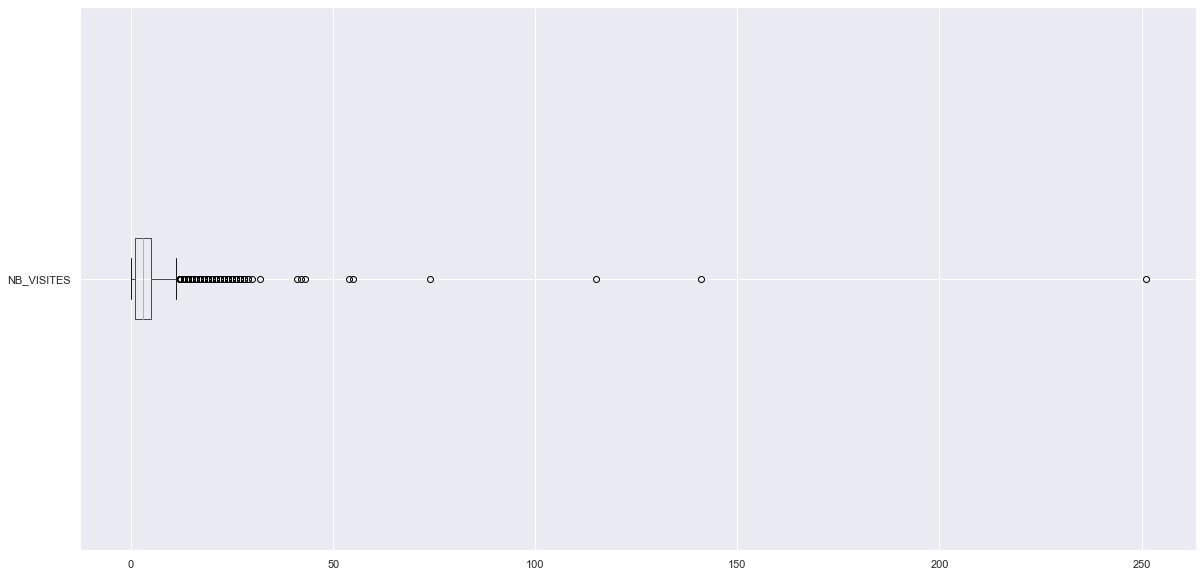

Shapiro–Wilk test :
statistic : 0.47916167974472046
pvalue : 0.0
D’Agostino and Pearson’s test :
null hypothesis: data comes from a normal distribution
The null hypothesis can be rejected : NB_VISITES is not normally distributed with 0.05 confidence.


/Users/alexei/lead-scoring-alessio-marieme/.venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


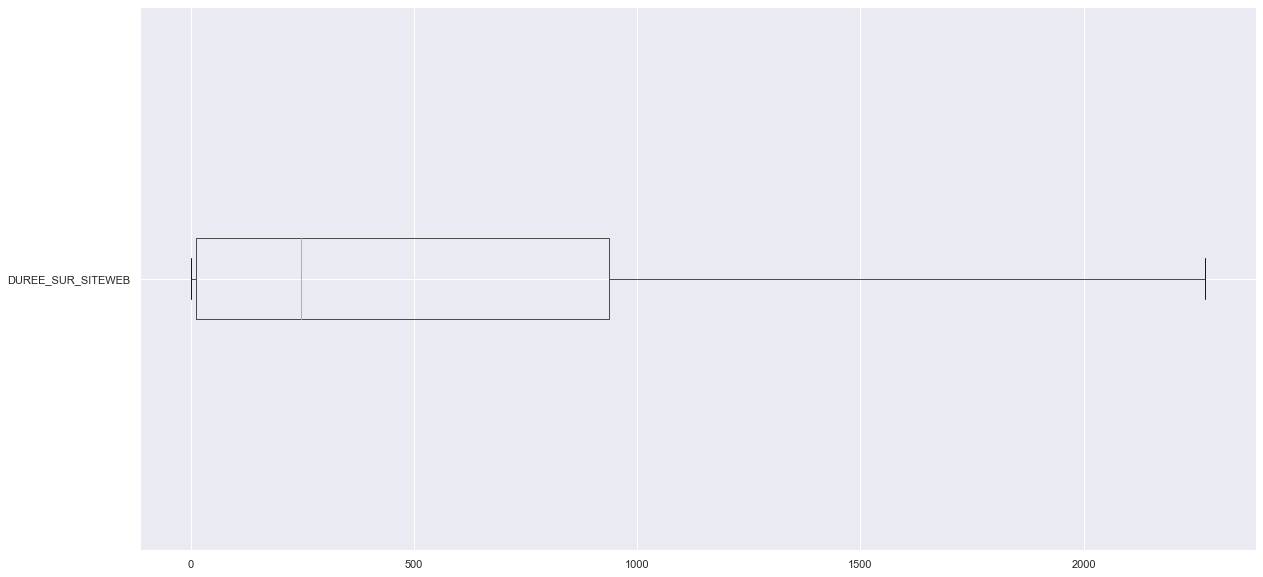

Shapiro–Wilk test :
statistic : 0.8263155817985535
pvalue : 0.0
D’Agostino and Pearson’s test :
null hypothesis: data comes from a normal distribution
The null hypothesis can be rejected : DUREE_SUR_SITEWEB is not normally distributed with 0.05 confidence.


/Users/alexei/lead-scoring-alessio-marieme/.venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


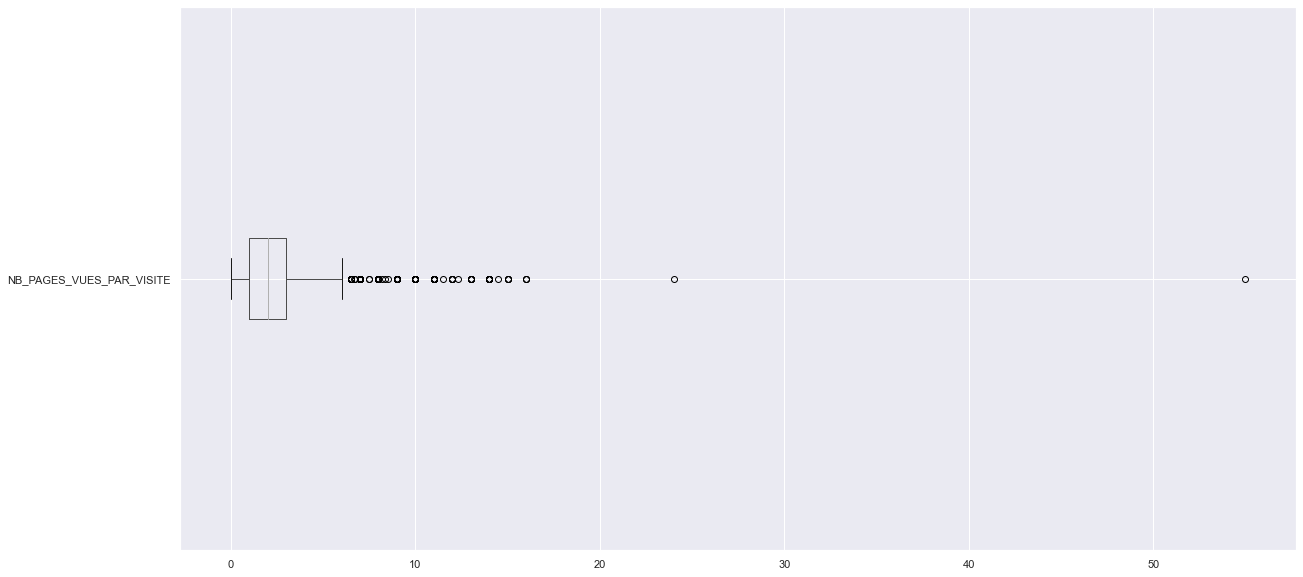

Shapiro–Wilk test :
statistic : 0.838814914226532
pvalue : 0.0
D’Agostino and Pearson’s test :
null hypothesis: data comes from a normal distribution
The null hypothesis can be rejected : NB_PAGES_VUES_PAR_VISITE is not normally distributed with 0.05 confidence.


/Users/alexei/lead-scoring-alessio-marieme/.venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [95]:
alpha = 0.05

for var in cont_vars:
    d = data[[var]][~data[var].isna()]
    d.boxplot(vert=False)
    plt.show()
    print('Shapiro–Wilk test :')
    print('statistic : ' + str(stats.shapiro(d).statistic))
    print('pvalue : ' + str(stats.shapiro(d).pvalue))
    
    print('D’Agostino and Pearson’s test :')
    a = np.random.normal(d.mean(), d.std(), size=len(d))
    x = np.concatenate((a, d.values.squeeze()))
    k2, p = stats.normaltest(x)
    print(f'null hypothesis: data comes from a normal distribution')
    if p < alpha:  
        print(f"The null hypothesis can be rejected : {var} is not normally distributed with {alpha} confidence.")
    else:
        print(f"The null hypothesis cannot be rejected : {var} is normally distributed.")

Some of our variables are not normally distributed. Let's use spearman test to estimate their intercorrelations.

In [5]:
print('NB_VISITES / NB_PAGES_VUES_PAR_VISITE')
rho, pval = stats.spearmanr(data['NB_VISITES'].fillna(0), data['NB_PAGES_VUES_PAR_VISITE'].fillna(0))
print('Spearman test : ')
print('rho : ' + str(rho))
print('pvalue : ' + str(pval))

tau, p_value = stats.kendalltau(data['NB_VISITES'].fillna(0), data['NB_PAGES_VUES_PAR_VISITE'].fillna(0))
print('Kendal test : ')
print('tau : ' + str(tau))
print('pvalue : ' + str(pval))

NB_VISITES / NB_PAGES_VUES_PAR_VISITE
Spearman test : 
rho : 0.8559345523754859
pvalue : 0.0
Kendal test : 
tau : 0.7509125799037492
pvalue : 0.0


In [6]:
print('NB_VISITES / DUREE_SUR_SITEWEB')
rho, pval = stats.spearmanr(data['NB_VISITES'].fillna(0), data['DUREE_SUR_SITEWEB'].fillna(0))
print('rho : ' + str(rho))
print('pvalue : ' + str(pval))

tau, p_value = stats.kendalltau(data['NB_VISITES'].fillna(0), data['DUREE_SUR_SITEWEB'].fillna(0))
print('Kendal test : ')
print('tau : ' + str(tau))
print('pvalue : ' + str(pval))

NB_VISITES / DUREE_SUR_SITEWEB
rho : 0.5587599796077237
pvalue : 0.0
Kendal test : 
tau : 0.41211449939093875
pvalue : 0.0


In [7]:
print('NB_PAGES_VUES_PAR_VISITE / DUREE_SUR_SITEWEB')
rho, pval = stats.spearmanr(data['NB_PAGES_VUES_PAR_VISITE'].fillna(0), data['DUREE_SUR_SITEWEB'].fillna(0))
print('rho : ' + str(rho))
print('pvalue : ' + str(pval))

tau, p_value = stats.kendalltau(data['NB_PAGES_VUES_PAR_VISITE'].fillna(0), data['DUREE_SUR_SITEWEB'].fillna(0))
print('Kendal test : ')
print('tau : ' + str(tau))
print('pvalue : ' + str(pval))

NB_PAGES_VUES_PAR_VISITE / DUREE_SUR_SITEWEB
rho : 0.5447375509917615
pvalue : 0.0
Kendal test : 
tau : 0.39741503464359634
pvalue : 0.0


Let's estimate the correlation between our continuous variables and our target which is a binary variable.

In [100]:
for var in cont_vars:
    d = data[[var, 'CONVERTI']][~data[var].isna()]
    r, pvalue = stats.pointbiserialr(d['CONVERTI'], d[var])
    print(var + ' / CONVERTI')
    print('r : ' + str(r))
    print('pvalue : ' + str(pval))
    print()

NB_VISITES / CONVERTI
r : 0.029974700105187217
pvalue : 0.0

DUREE_SUR_SITEWEB / CONVERTI
r : 0.36287163085302715
pvalue : 0.0

NB_PAGES_VUES_PAR_VISITE / CONVERTI
r : -0.003474471203874104
pvalue : 0.0



To maximise performance of linear models, we need to account for non-Gaussian distributions. We will transform our variables using a logarithmic transformation.

In [13]:
corr_mat = data[num_vars].corr().abs()
corr_mat

,ID_CLIENT,CONVERTI,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,SCORE_ACTIVITE,SCORE_PROFIL
ID_CLIENT,1.000000,0.024898,0.022411,0.020480,0.059540,0.067491,0.128733
CONVERTI,0.024898,1.000000,0.029975,0.362872,0.003474,0.167680,0.217766
NB_VISITES,0.022411,0.029975,1.000000,0.219854,0.511328,0.058311,0.131931
DUREE_SUR_SITEWEB,0.020480,0.362872,0.219854,1.000000,0.319179,0.065913,0.177224
NB_PAGES_VUES_PAR_VISITE,0.059540,0.003474,0.511328,0.319179,1.000000,0.161366,0.161814
SCORE_ACTIVITE,0.067491,0.167680,0.058311,0.065913,0.161366,1.000000,0.123112
SCORE_PROFIL,0.128733,0.217766,0.131931,0.177224,0.161814,0.123112,1.000000


<AxesSubplot:title={'center':'Correlation of Features - HeatMap'}>

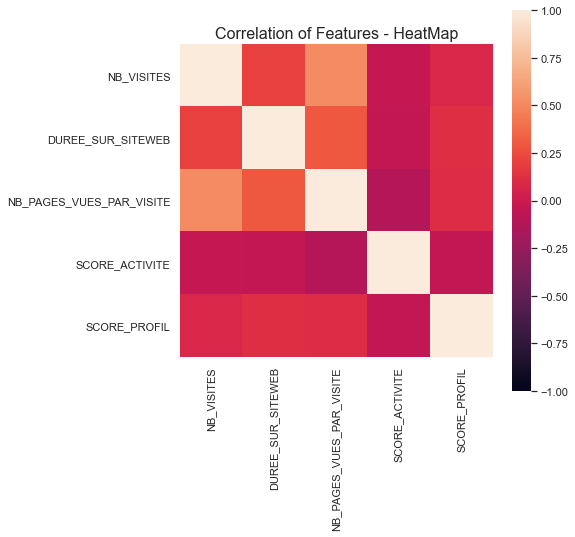

In [49]:
f , ax = plt.subplots(figsize = (7,7))
plt.title('Correlation of Features - HeatMap',y=1,size=16)
sns.heatmap(data[num_vars].corr(),square = True,  vmax=1,  vmin=-1)

There seems to be very low correlation between our continuous variable :

In [48]:
for col in corr_mat.columns :
    if col not in ['ID_CLIENT', 'CONVERTI'] :
        print("column : {:-<30} max variance : {}".format(col, corr_mat[col].nlargest(2)[1]))

column : NB_VISITES-------------------- max variance : 0.511328350060818
column : DUREE_SUR_SITEWEB------------- max variance : 0.36287163085302926
column : NB_PAGES_VUES_PAR_VISITE------ max variance : 0.511328350060818
column : SCORE_ACTIVITE---------------- max variance : 0.16767991109271477
column : SCORE_PROFIL------------------ max variance : 0.21776615582073997


## Low Variance Filter

Variables with low variance bring little information. We should get rid of them.

In [50]:
value = {col: data[col].mode()[0] for col in cont_vars}
data.fillna(value=value, inplace=True)

In [51]:
data.select_dtypes(include=[np.float64, np.int64]).var().sort_values()

CONVERTI                    2.368931e-01
SCORE_ACTIVITE              1.062013e+00
SCORE_PROFIL                2.224613e+00
NB_PAGES_VUES_PAR_VISITE    4.683212e+00
NB_VISITES                  2.345205e+01
DUREE_SUR_SITEWEB           3.005519e+05
ID_CLIENT                   5.473915e+08
dtype: float64

We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [32]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  28


In [33]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,ORIGINE_LEAD,SOURCE_LEAD,NIVEAU_LEAD,QUALITE_LEAD,CONTACT_PAR_MAIL,CONTACT_PAR_TELEPHONE,STATUT_ACTUEL,DERNIERE_ACTIVITE,DERNIERE_ACTIVITE_NOTABLE,PAYS,VILLE,SPECIALISATION,TAGS,INDEX_ACTIVITE,INDEX_PROFIL,ANNONCE_VUE,MAGAZINE,ARTICLE_JOURNAL,FORUM,JOURNAUX,PUB_DIGITALE,RECOMMANDATION,Comment avez-vous entendu parler de nous ?,Souhaites-tu recevoir plus d'infos sur notre cours ?,Souhaites-tu recevoir des mises à jour sur nos programmes ?,Souhaites-tu recevoir des mises à jour par message privé ?,Souhaites-tu payer par chèque ?,Souhaites-tu recevoir une copie de notre livre blanc ?
0,Formulaire Lead Add,Olark Chat,Select,NaN,Non,Non,Sans emploi,Email ouvert,Email ouvert,NaN,Select,Marketing Management,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
1,Soumission landing page,Organic Search,Autre leads,Pas du tout pertinent,Non,Non,Sans emploi,Page visitée sur le site,Modifié,India,Autres villes de Maharashtra,"Banking, Investment And Insurance",Ne pas suivre de formation continue,Moyen,Elevé,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Oui
2,Soumission landing page,Google,NaN,NaN,Non,Non,NaN,Email ouvert,Email ouvert,India,Mumbai,Hospitality Management,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,NaN,Non,Non,Non,Non,Non
3,Formulaire Lead Add,Reference,Lead potentiel,Pourrait être pertinent,Non,Non,Sans emploi,Email ouvert,Email ouvert,NaN,Select,"Banking, Investment And Insurance",Reviendra après avoir lu le courriel,Moyen,Elevé,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
4,Soumission landing page,Direct Traffic,NaN,NaN,Non,Non,NaN,Email ouvert,Email ouvert,India,Autres villes,Finance Management,NaN,Moyen,Moyen,Non,Non,Non,Non,Non,Non,Non,Etudiant d'une certaine école,Non,Non,Non,Non,Non


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [65]:
data[cat_vars].nunique()

ORIGINE_LEAD                                                    5
SOURCE_LEAD                                                    21
NIVEAU_LEAD                                                     6
QUALITE_LEAD                                                    5
CONTACT_PAR_MAIL                                                2
CONTACT_PAR_TELEPHONE                                           2
STATUT_ACTUEL                                                   6
DERNIERE_ACTIVITE                                              17
DERNIERE_ACTIVITE_NOTABLE                                      16
PAYS                                                           38
VILLE                                                           7
SPECIALISATION                                                 19
TAGS                                                           25
INDEX_ACTIVITE                                                  3
INDEX_PROFIL                                                    3
ANNONCE_VU

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

#### Rare labels:

Investigate if there are labels that are present only in a small number of prospects:

In [66]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['CONVERTI'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

ORIGINE_LEAD
Formulaire Quick Add    0.000109
Importation de lead     0.005983
Name: CONVERTI, dtype: float64

SOURCE_LEAD
Click2call           0.000435
Facebook             0.005983
Live Chat            0.000218
NC_EDM               0.000109
Pay per Click Ads    0.000109
Press_Release        0.000218
Social Media         0.000218
WeLearn              0.000109
bing                 0.000653
blog                 0.000109
google               0.000544
testone              0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
Name: CONVERTI, dtype: float64

NIVEAU_LEAD
Etudiant                             0.002611
Etudiant en double spécialisation    0.002176
Name: CONVERTI, dtype: float64

Series([], Name: CONVERTI, dtype: float64)

Series([], Name: CONVERTI, dtype: float64)

CONTACT_PAR_TELEPHONE
Oui    0.000218
Name: CONVERTI, dtype: float64

STATUT_ACTUEL
Autre              0.001740
Femme au foyer     0.001088
Homme d'affaire    0.000870
Name: CONVERTI, dtype: float64

D

In [55]:
def _plot(col='', title='') :
    temp = data[[col, 'CONVERTI']].groupby(col).count()['CONVERTI']
    labels = temp.index
    x = np.arange(len(labels)) 
    total = temp.values
    converted = data[[col, 'CONVERTI']].groupby(col).sum()['CONVERTI'].values
    not_converted = total - converted

    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, converted, width, label='converted')
    rects2 = ax.bar(x + width/2, not_converted, width, label='not_converted')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Conversion')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90, ha='right')
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    #fig.tight_layout()
    plt.figure(figsize=(150,400))

    plt.show()

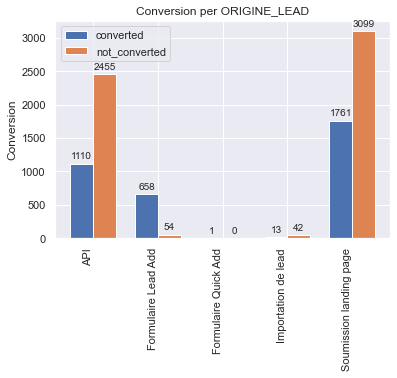

<Figure size 10800x28800 with 0 Axes>

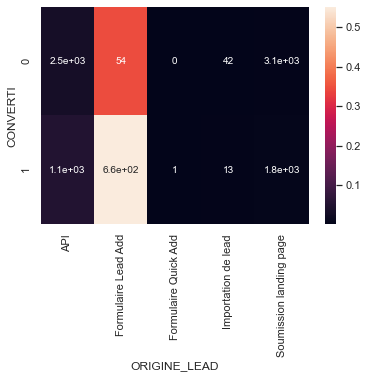

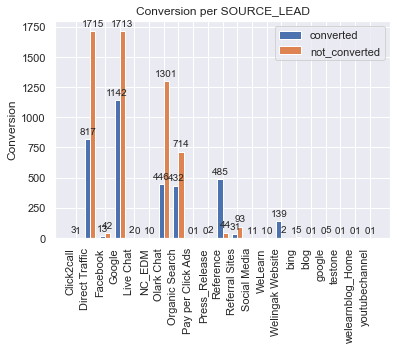

<Figure size 10800x28800 with 0 Axes>

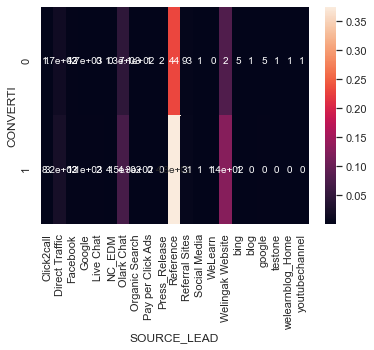

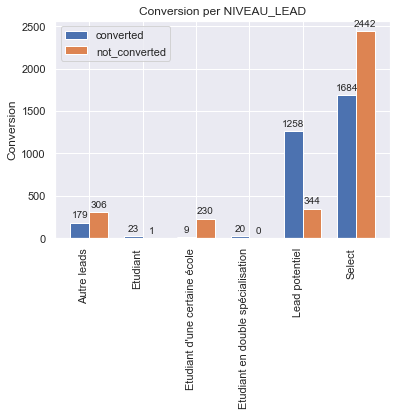

<Figure size 10800x28800 with 0 Axes>

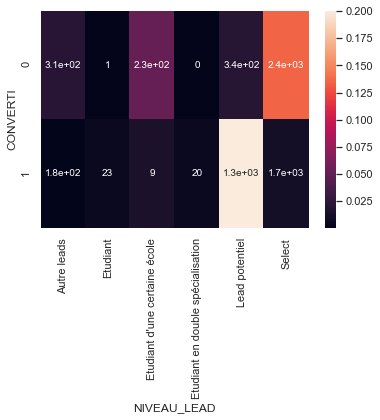

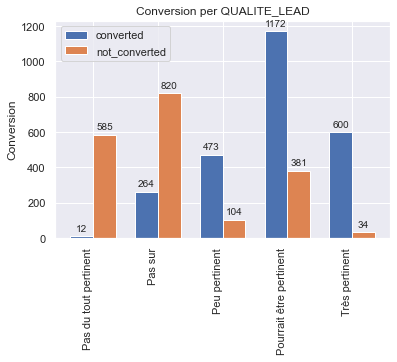

<Figure size 10800x28800 with 0 Axes>

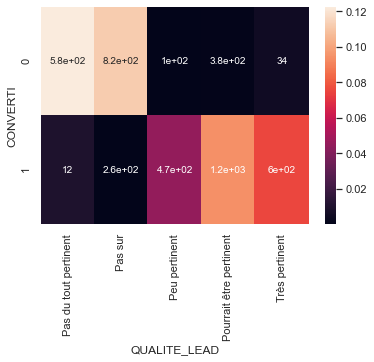

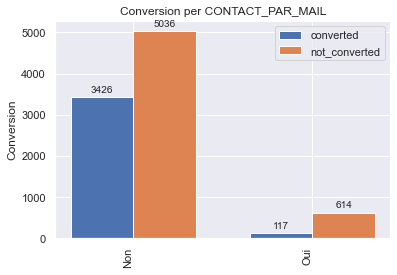

<Figure size 10800x28800 with 0 Axes>

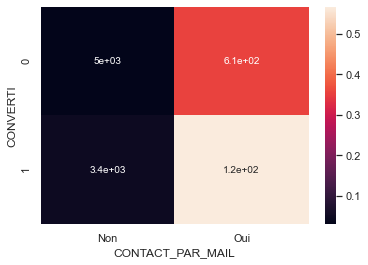

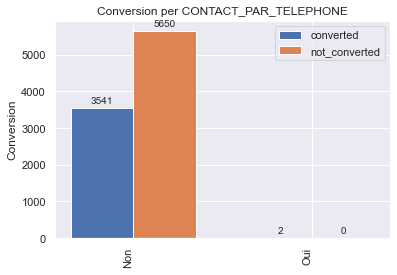

<Figure size 10800x28800 with 0 Axes>

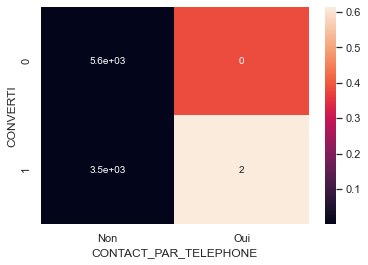

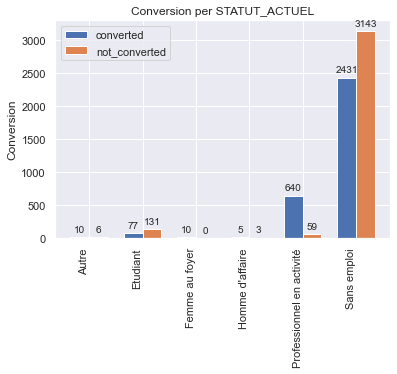

<Figure size 10800x28800 with 0 Axes>

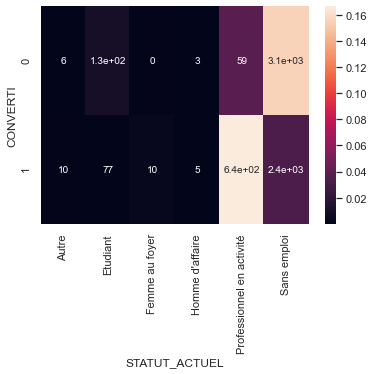

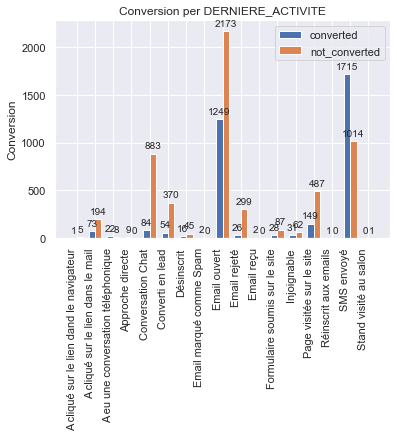

<Figure size 10800x28800 with 0 Axes>

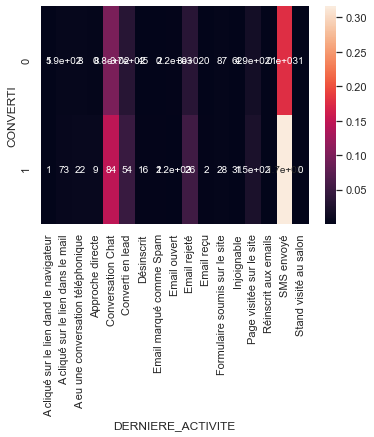

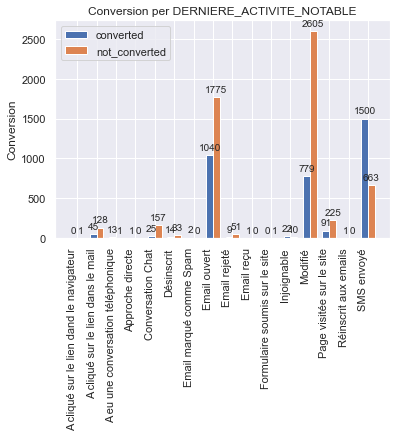

<Figure size 10800x28800 with 0 Axes>

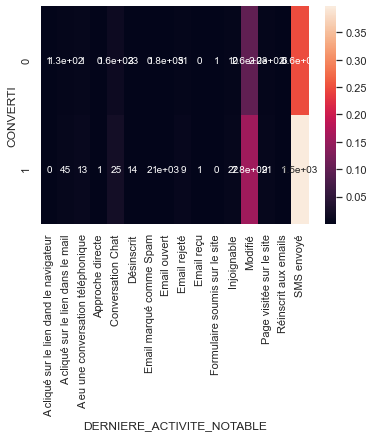

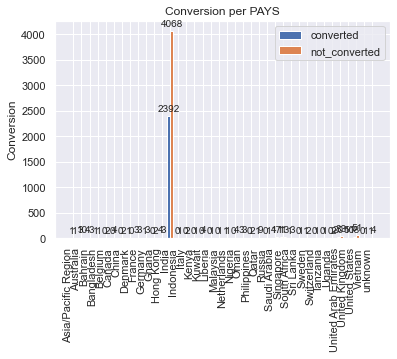

<Figure size 10800x28800 with 0 Axes>

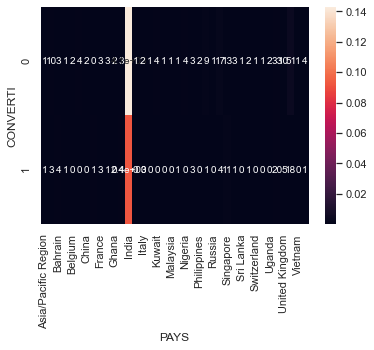

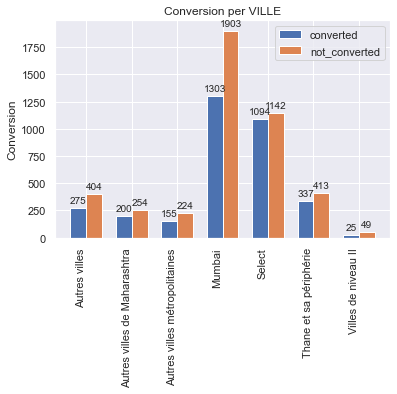

<Figure size 10800x28800 with 0 Axes>

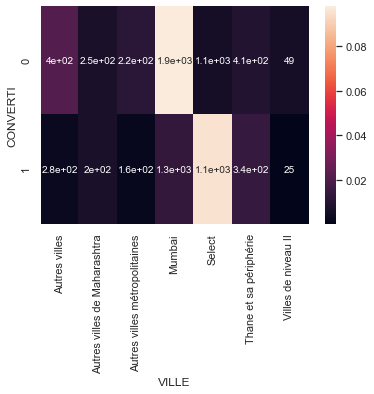

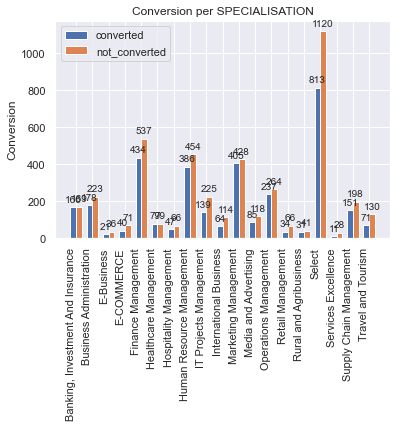

<Figure size 10800x28800 with 0 Axes>

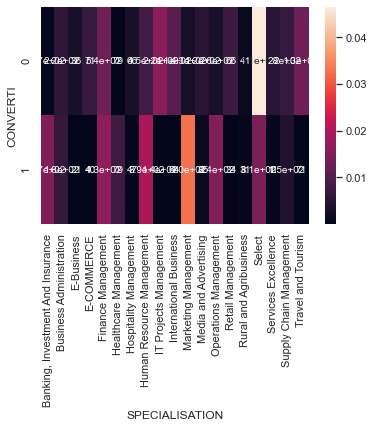

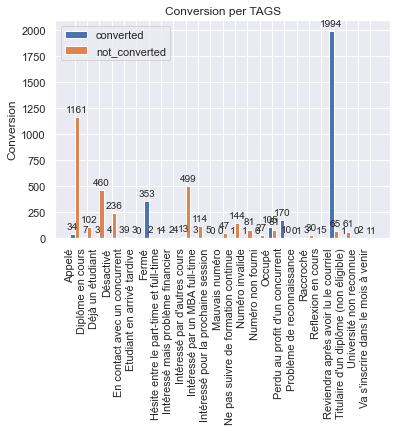

<Figure size 10800x28800 with 0 Axes>

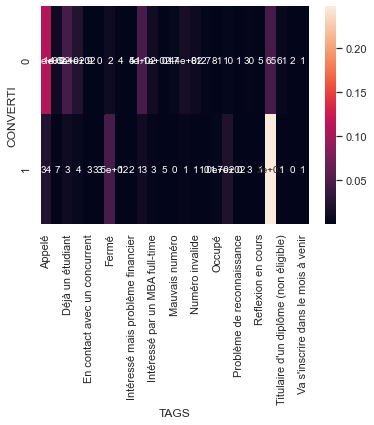

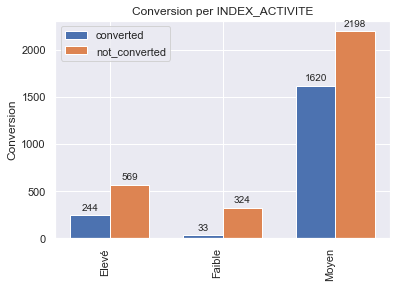

<Figure size 10800x28800 with 0 Axes>

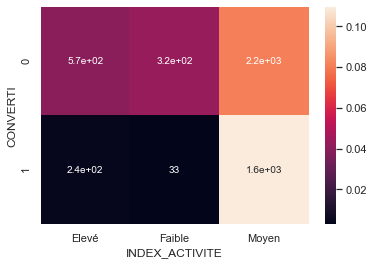

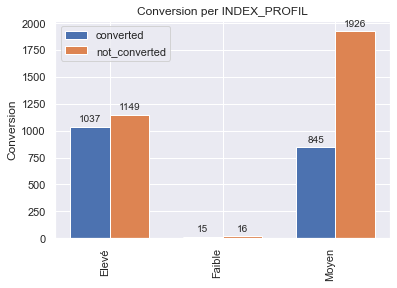

<Figure size 10800x28800 with 0 Axes>

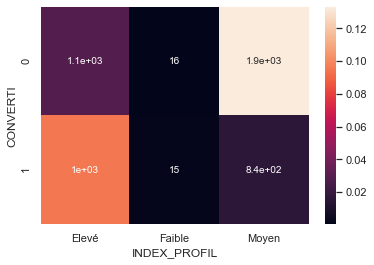

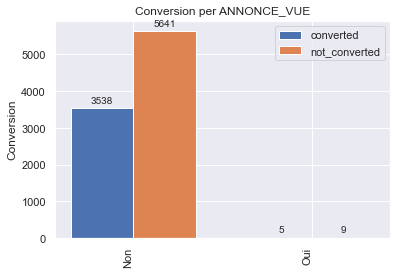

<Figure size 10800x28800 with 0 Axes>

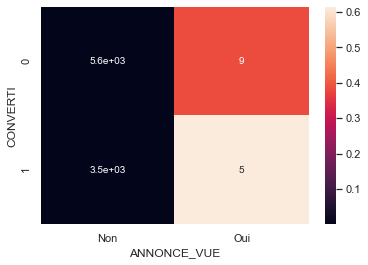

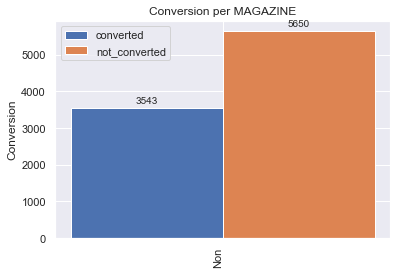

<Figure size 10800x28800 with 0 Axes>

/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


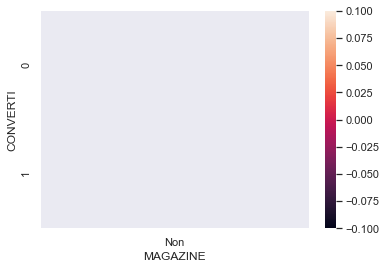

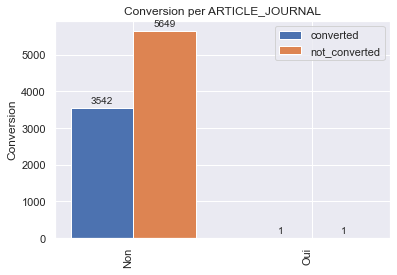

<Figure size 10800x28800 with 0 Axes>

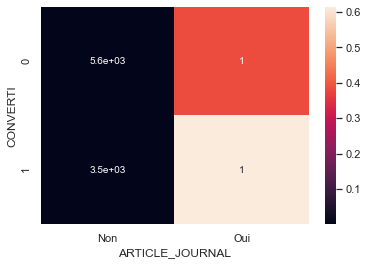

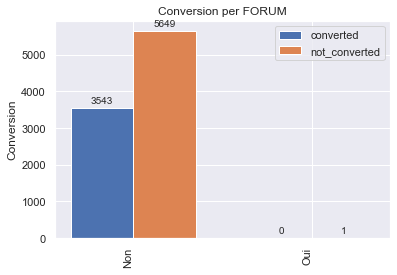

<Figure size 10800x28800 with 0 Axes>

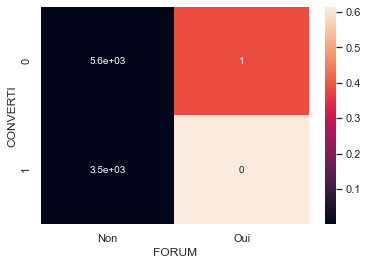

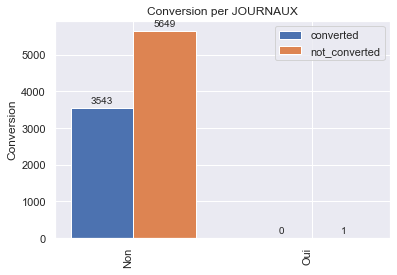

<Figure size 10800x28800 with 0 Axes>

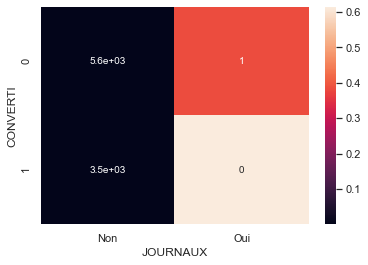

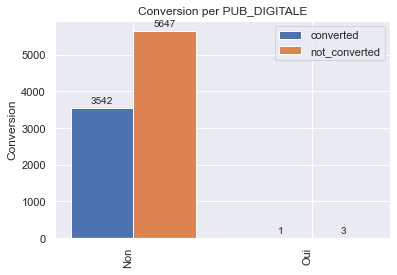

<Figure size 10800x28800 with 0 Axes>

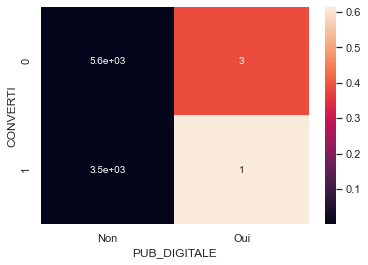

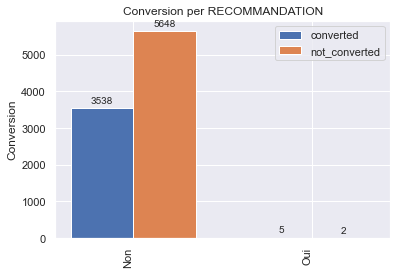

<Figure size 10800x28800 with 0 Axes>

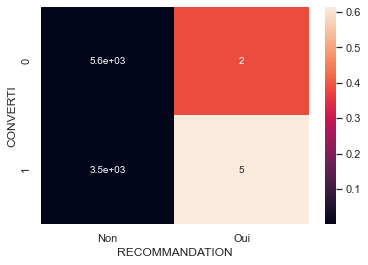

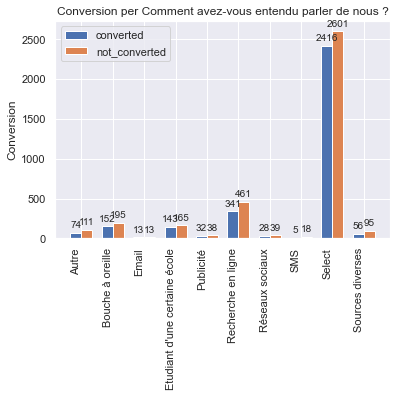

<Figure size 10800x28800 with 0 Axes>

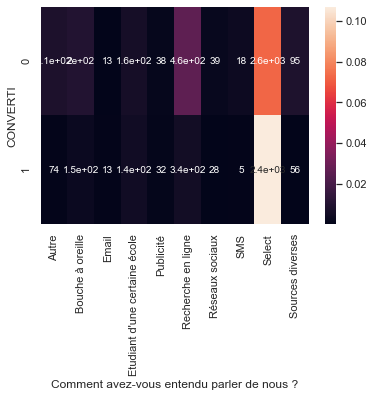

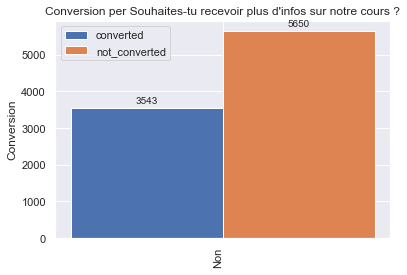

<Figure size 10800x28800 with 0 Axes>

/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


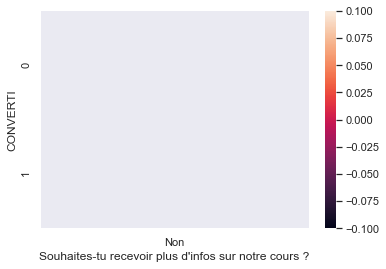

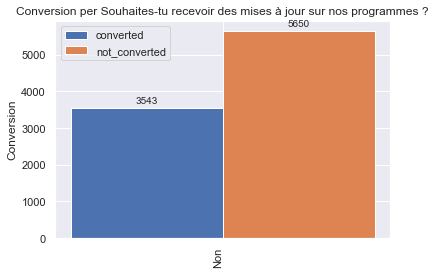

<Figure size 10800x28800 with 0 Axes>

/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


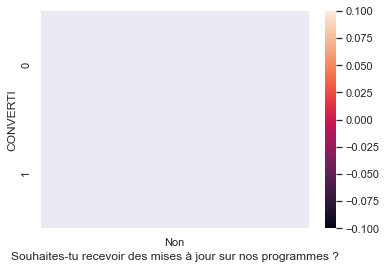

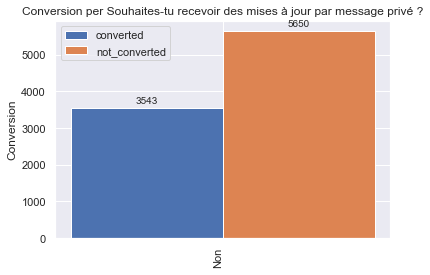

<Figure size 10800x28800 with 0 Axes>

/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


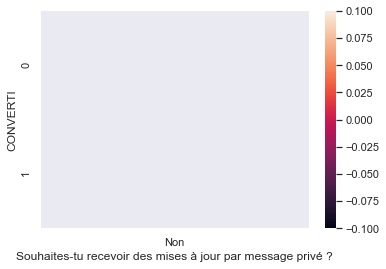

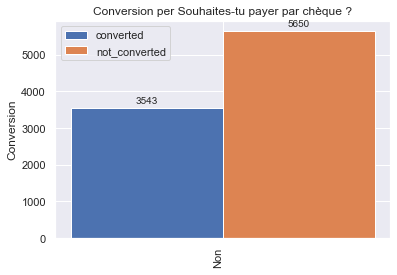

<Figure size 10800x28800 with 0 Axes>

/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


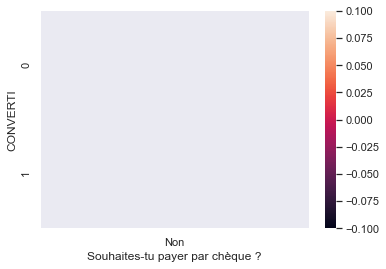

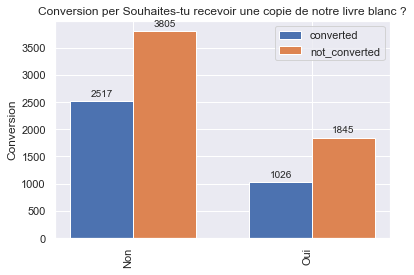

<Figure size 10800x28800 with 0 Axes>

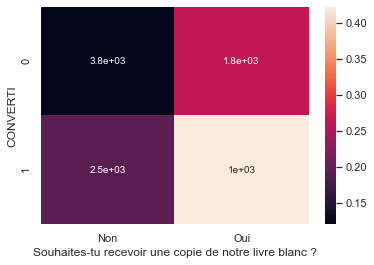

In [56]:
for var in cat_vars:
    _plot(col=var, title='Conversion per '+var)
    contigency(var)

In [14]:
def cramers_stat(crosstab):
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum()
    return np.sqrt(chi2 / (n*(min(crosstab.shape)-1)))

In [15]:
def contigency(Y, X = 'CONVERTI') :
    
    cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

    tx = cont.loc[:,["Total"]]
    ty = cont.loc[["Total"],:]
    n = len(data)
    indep = tx.dot(ty) / n

    c = cont.fillna(0) 
    measure = (c-indep)**2/indep
    xi_n = measure.sum().sum()
    table = measure/xi_n
    sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
    plt.show()
    
    return cont

Power_divergenceResult(statistic=array([1790.85021029,  933.1829204 ]), pvalue=array([0.00000000e+000, 2.30093066e-203]))

Cramer test : 0.17357473726351433


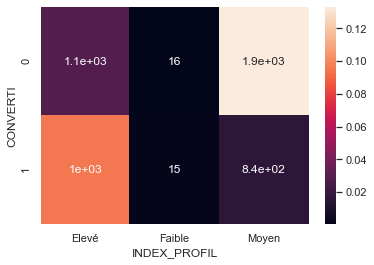

INDEX_PROFIL,Elevé,Faible,Moyen,Total
CONVERTI,,,,
0,1149,16,1926,3091
1,1037,15,845,1897
Total,2186,31,2771,4988


In [16]:
print(chisquare(pd.crosstab(data['INDEX_PROFIL'], data['CONVERTI'])))
print()
print(f"Cramer test : {cramers_stat(pd.crosstab(data['INDEX_PROFIL'], data['CONVERTI']).values)}")
contigency('INDEX_PROFIL')

Power_divergenceResult(statistic=array([7922.68823352, 5244.53104318]), pvalue=array([0., 0.]))

Cramer test : 0.3794965005569346


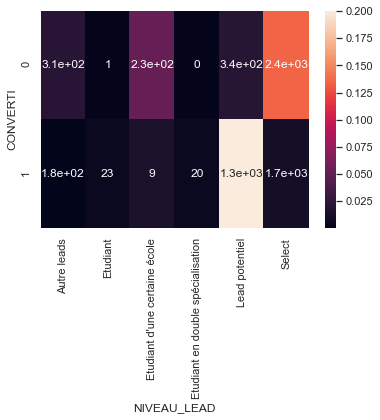

NIVEAU_LEAD,Autre leads,Etudiant,Etudiant d'une certaine école,Etudiant en double spécialisation,Lead potentiel,Select,Total
CONVERTI,,,,,,,
0,306.0,1.0,230.0,NaN,344.0,2442.0,3323
1,179.0,23.0,9.0,20.0,1258.0,1684.0,3173
Total,485.0,24.0,239.0,20.0,1602.0,4126.0,6496


In [18]:
print(chisquare(pd.crosstab(data['NIVEAU_LEAD'], data['CONVERTI'])))
print()
print(f"Cramer test : {cramers_stat(pd.crosstab(data['NIVEAU_LEAD'], data['CONVERTI']).values)}")
contigency('NIVEAU_LEAD')

Power_divergenceResult(statistic=array([2014.08670333, 2349.21771218]), pvalue=array([0., 0.]))

Cramer test : 0.18947431565467784


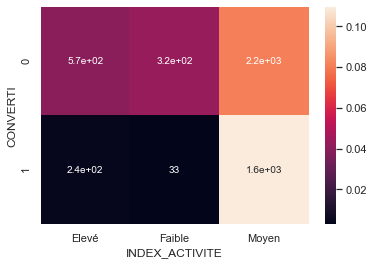

INDEX_ACTIVITE,Elevé,Faible,Moyen,Total
CONVERTI,,,,
0,569,324,2198,3091
1,244,33,1620,1897
Total,813,357,3818,4988


In [71]:
print(chisquare(pd.crosstab(data['INDEX_ACTIVITE'], data['CONVERTI'])))
print()
print(f"Cramer test : {cramers_stat(pd.crosstab(data['INDEX_ACTIVITE'], data['CONVERTI']).values)}")
contigency('INDEX_ACTIVITE')

Power_divergenceResult(statistic=array([8186.73097345, 3183.43945809]), pvalue=array([0., 0.]))

Cramer test : 0.3252749758853327


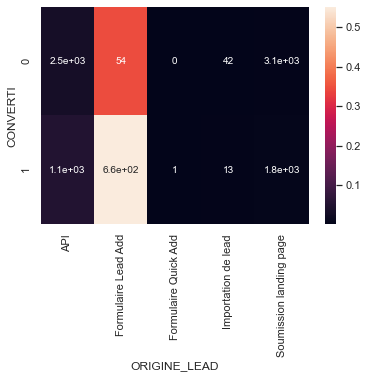

ORIGINE_LEAD,API,Formulaire Lead Add,Formulaire Quick Add,Importation de lead,Soumission landing page,Total
CONVERTI,,,,,,
0,2455.0,54.0,NaN,42.0,3099.0,5650
1,1110.0,658.0,1.0,13.0,1761.0,3543
Total,3565.0,712.0,1.0,55.0,4860.0,9193


In [70]:
print(chisquare(pd.crosstab(data['ORIGINE_LEAD'], data['CONVERTI'])))
print()
print(f"Cramer test : {cramers_stat(pd.crosstab(data['ORIGINE_LEAD'], data['CONVERTI']).values)}")
contigency('ORIGINE_LEAD')

Power_divergenceResult(statistic=array([ 779.57933579,  177.74789916, 1848.97171294]), pvalue=array([5.20592767e-170, 2.52658616e-039, 0.00000000e+000]))

Cramer test : 0.14395187227962833


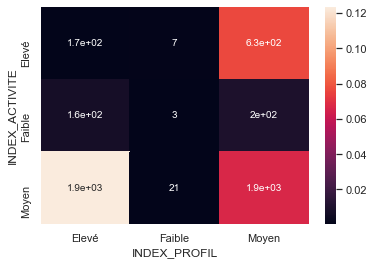

INDEX_PROFIL,Elevé,Faible,Moyen,Total
INDEX_ACTIVITE,,,,
Elevé,172,7,634,813
Faible,155,3,199,357
Moyen,1859,21,1938,3818
Total,2186,31,2771,4988


In [69]:
print(chisquare(pd.crosstab(data['INDEX_PROFIL'], data['INDEX_ACTIVITE'])))
print()
print(f"Cramer test : {cramers_stat(pd.crosstab(data['INDEX_PROFIL'], data['INDEX_ACTIVITE']).values)}")
contigency('INDEX_PROFIL', 'INDEX_ACTIVITE')

Power_divergenceResult(statistic=array([ 4104.8597786 ,  1310.05882353, 13004.29649031]), pvalue=array([0.00000000e+000, 3.03142679e-274, 0.00000000e+000]))

Cramer : 1.0


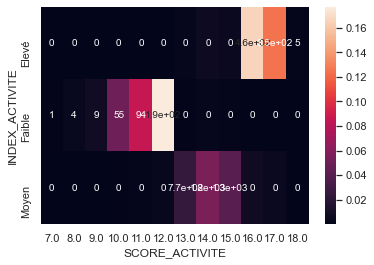

SCORE_ACTIVITE,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Total
INDEX_ACTIVITE,,,,,,,,,,,,,
Elevé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.0,346.0,5.0,813
Faible,1.0,4.0,9.0,55.0,94.0,194.0,NaN,NaN,NaN,NaN,NaN,NaN,357
Moyen,NaN,NaN,NaN,NaN,NaN,NaN,770.0,1763.0,1285.0,NaN,NaN,NaN,3818
Total,1.0,4.0,9.0,55.0,94.0,194.0,770.0,1763.0,1285.0,462.0,346.0,5.0,4988


In [68]:
print(chisquare(pd.crosstab(data['SCORE_ACTIVITE'], data['INDEX_ACTIVITE'])))
print()
print(f"Cramer test : {cramers_stat(pd.crosstab(data['SCORE_ACTIVITE'], data['INDEX_ACTIVITE']).values)}")
contigency('SCORE_ACTIVITE', 'INDEX_ACTIVITE')